In [ ]:
# Import packages!

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import os
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
import sys
import joblib

In [ ]:
# If using Google Colab, mount Google Drive so you can access the files in this folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# -----Define paths in directory

# RAINEY'S PATH TO SNOW-COVER-MAPPING-APPLICATION
#base_path = '/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/snow-cover-mapping-application/'

# RAINEY'S PATH TO DATA:
#path_to_folder = os.path.join(base_path, 'inputs-outputs')

# ALEXANDRA'S PATH TO SNOW-COVER-MAPPING-APPLICATION
# base_path = '/content/drive/MyDrive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/snow-cover-mapping-application'

# ALEXANDRA'S PATH TO DATA:
path_to_folder = ('/content/drive/MyDrive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/terrain-parameters/')

# Remote Sensing Project Path to Data:
#path_to_folder = ('/content/drive/Shareddrives/GEOG361_Final_Project/')


In [ ]:
os.listdir('/content/drive/MyDrive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/terrain-parameters/')

['ELA_training_data.csv',
 'O1_1_terrain_parameters - Sheet1.csv',
 'ModerateSlope_terrainparameters - Sheet1.csv',
 'GentleSlope_terrainparameters - Sheet1.csv',
 'SimpleGeometry_terrainparameters - Sheet1.csv',
 'ComplexGeometry_terrain_parameters - Sheet1.csv',
 'ModerateGeometry_terrainparameters - Sheet1.csv',
 'O2_2_terrain_parameters - Sheet1.csv',
 'O2_3_terrain_parameters - Sheet1.csv',
 'O2_4_terrain_parameters - Sheet1.csv',
 'O2_6_terrain_parameters - Sheet1.csv',
 'O2_5_terrain_parameters - Sheet1.csv',
 'O2_1_terrain_parameters - Sheet1.csv',
 'O1_2_terrain_parameters - Sheet1.csv',
 'GoogleSheets',
 'Totalsite_terrainparameters.csv',
 'SteepSlope_terrainparameters.csv']

In [ ]:
fn = 'Totalsite_terrainparameters.csv'  # file name
# fn = ('Totalsite_terrainparameters.csv') # <--This file doesn't have snow cover observations, just terrain parameters
df = pd.read_csv(os.path.join(path_to_folder, fn))

# format 'datetime' column as pandas.datetimes (no datetime column in terrain parameters CSVs)
#if 'datetime' in df.keys():
  #df['datetime'] = pd.to_datetime(df['datetime'])
df

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,Zmax,Zmed,Slope,Aspect,Lmax,Status,Connect,Form,TermType,Surging
0,RGI60-02.04403,G234747E51416N,20049999.0,20069999.0,-125.253,51.4164,2.0,2.0,40.605,960.0,3980.0,2222.0,18.8,12.0,18486.0,0.0,0.0,0.0,0.0,0.0
1,RGI60-02.06145,G242876E51975N,20049999.0,20069999.0,-117.124,51.9750,2.0,3.0,7.213,1597.0,3457.0,2351.0,19.1,352.0,5801.0,0.0,0.0,0.0,0.0,0.0
2,RGI60-02.06149,G242901E51915N,20049999.0,20069999.0,-117.099,51.9153,2.0,3.0,15.814,1850.0,3296.0,2651.0,12.3,149.0,6869.0,0.0,0.0,0.0,0.0,0.0
3,RGI60-02.06152,G242959E51922N,20049999.0,20069999.0,-117.041,51.9223,2.0,3.0,17.945,1548.0,3315.0,2640.0,11.9,112.0,7620.0,0.0,0.0,0.0,0.0,0.0
4,RGI60-02.06868,G242228E52222N,20049999.0,20069999.0,-117.772,52.2219,2.0,3.0,9.063,1878.0,3151.0,2410.0,21.7,16.0,4880.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,RGI60-02.03769,G235680E51267N,20049999.0,20069999.0,-124.320,51.2670,2.0,2.0,5.572,1962.0,2731.0,2258.0,13.8,29.0,3923.0,0.0,0.0,0.0,0.0,0.0
82,RGI60-02.04305,G234539E51426N,20049999.0,20069999.0,-125.461,51.4263,2.0,2.0,9.045,1366.0,2960.0,2168.0,19.5,355.0,5840.0,0.0,0.0,0.0,0.0,0.0
83,RGI60-02.04363,G234844E51281N,20049999.0,20069999.0,-125.156,51.2805,2.0,2.0,40.624,688.0,3197.0,2097.0,13.5,150.0,15673.0,0.0,0.0,0.0,0.0,0.0
84,RGI60-02.04403,G234747E51416N,20049999.0,20069999.0,-125.253,51.4164,2.0,2.0,40.605,960.0,3980.0,2222.0,18.8,12.0,18486.0,0.0,0.0,0.0,0.0,NaN


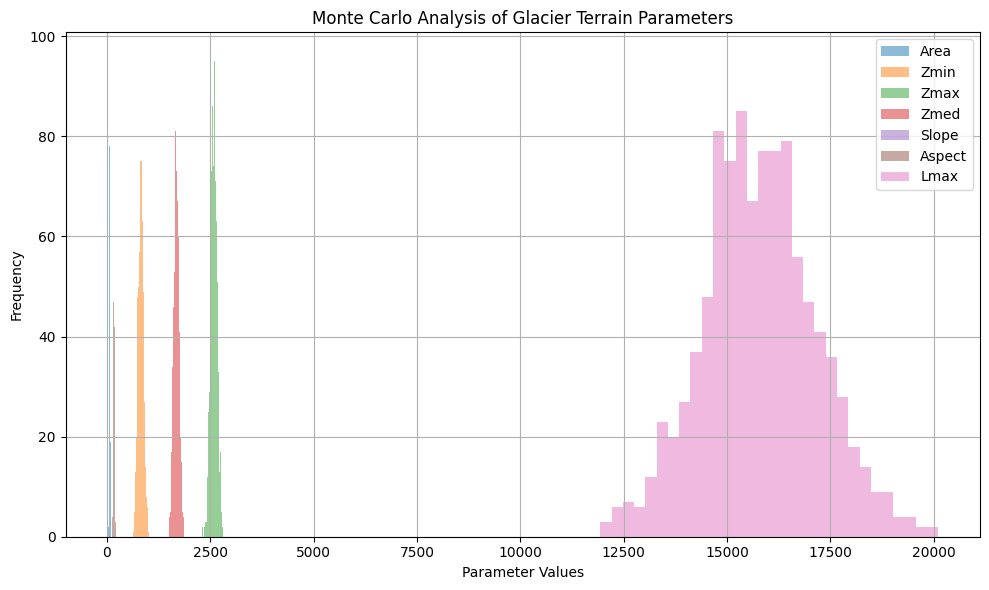

In [ ]:
#Monte Carlo!

# Parameters for Monte Carlo analysis
num_samples = 1000  # Number of Monte Carlo samples

parameters = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax']
param_data = df[parameters]

# Monte Carlo analysis
results = []
for _ in range(num_samples):
    sampled_data = param_data.sample(frac=1, replace=True)
    results.append(sampled_data.mean())

results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))

for column in results_df.columns:
    plt.hist(results_df[column], bins=30, alpha=0.5, label=column)

plt.title('Monte Carlo Analysis of Glacier Terrain Parameters')
plt.xlabel('Parameter Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


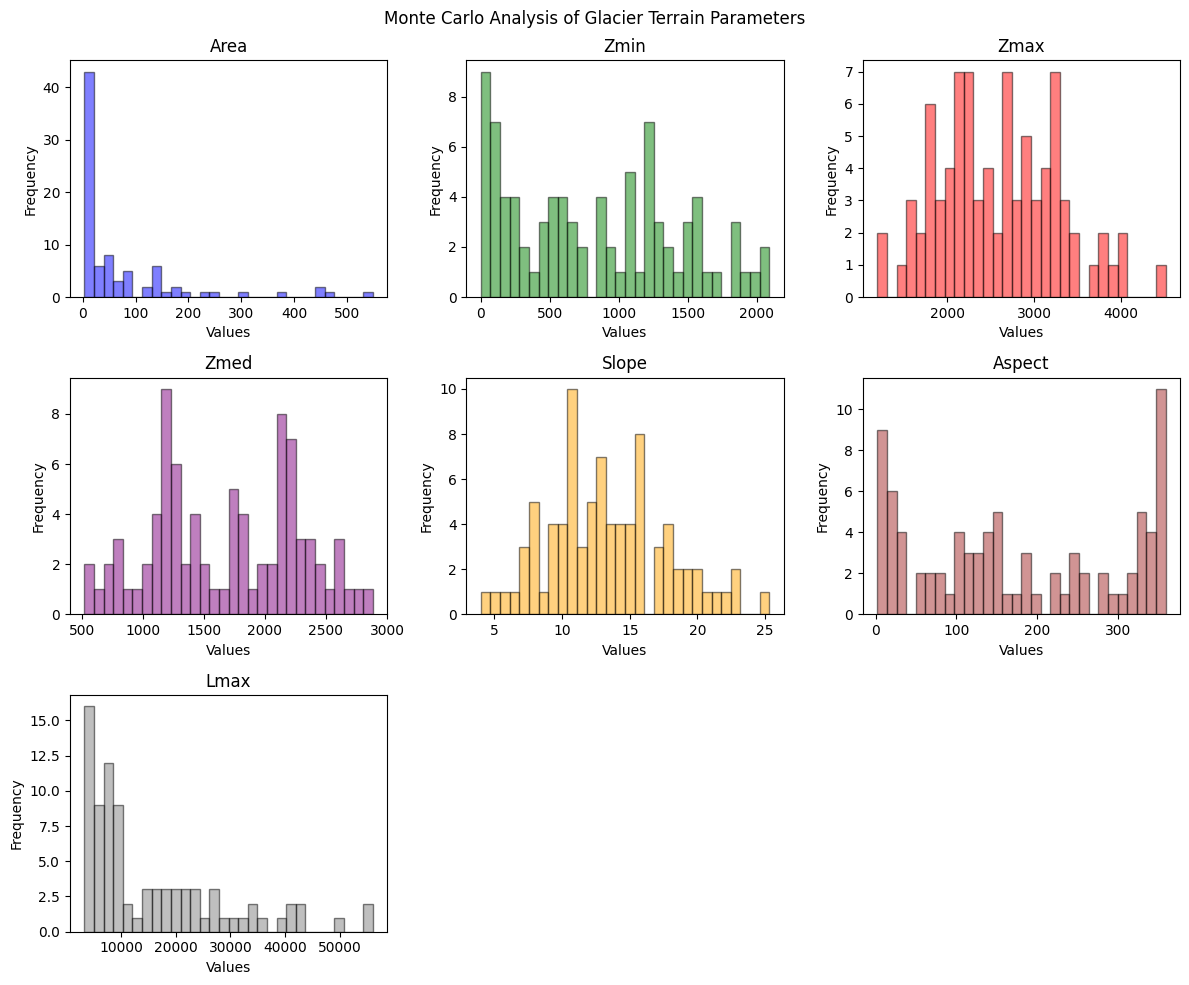

In [ ]:
#Didn't like how it was squashed, plotted them separately:

fn = 'Totalsite_terrainparameters.csv'
parameters = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax']

num_params = len(parameters)
num_cols = 3
num_rows = num_params // num_cols + (num_params % num_cols > 0)

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))
axs = axs.flatten()

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'gray']
for i, (param, color) in enumerate(zip(parameters, colors)):
    ax = axs[i]
    ax.hist(df[param], bins=30, alpha=0.5, color=color, edgecolor='black')
    ax.set_title(param)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# Hide any empty subplots
for j in range(len(parameters), num_rows * num_cols):
    fig.delaxes(axs[j])

plt.suptitle('Monte Carlo Analysis of Glacier Terrain Parameters', y=0.98)
plt.tight_layout()
plt.show()




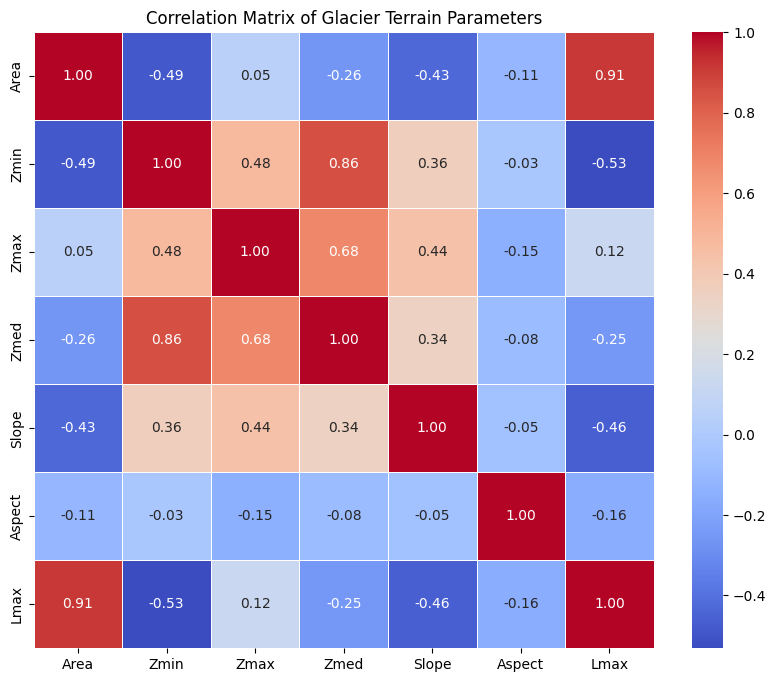

In [ ]:
fn = 'Totalsite_terrainparameters.csv'  # file name

file_path = os.path.join(path_to_folder, fn)
df = pd.read_csv(file_path)

parameters = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax']
correlation_matrix = df[parameters].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Glacier Terrain Parameters')
plt.show()

#Represents the strength of the correlation, where blue is a negative correlation and red is a positive correlation. The intensity of the color denotes
#the strength of the correlation, shown by the bar.

In [ ]:
import pandas as pd
from scipy.stats import kstest, norm
import os


fn = 'Totalsite_terrainparameters.csv'  # file name
# Parameters to analyze
parameters = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax']

for param in parameters:
    data = df[param]
    data = data.dropna()  # Remove NaN values

    if not data.empty:
        # Perform Kolmogorov-Smirnov test
        ks_statistic, p_value = kstest(data, 'norm')

        print(f"Parameter: {param}")
        print(f"Kolmogorov-Smirnov test statistic: {ks_statistic}")
        print(f"P-value: {p_value}")

        alpha = 0.05  # Significance level
        if p_value < alpha:
            print("Null hypothesis (data comes from a normal distribution) rejected.\n")
        else:
            print("Fail to reject the null hypothesis (data comes from a normal distribution).\n")
    else:
        print(f"No valid data for parameter: {param}\n")


Parameter: Area
Kolmogorov-Smirnov test statistic: 0.9990645632804859
P-value: 6.874722234969955e-258
Null hypothesis (data comes from a normal distribution) rejected.

Parameter: Zmin
Kolmogorov-Smirnov test statistic: 0.9633559843213111
P-value: 1.7429708352501386e-122
Null hypothesis (data comes from a normal distribution) rejected.

Parameter: Zmax
Kolmogorov-Smirnov test statistic: 1.0
P-value: 0.0
Null hypothesis (data comes from a normal distribution) rejected.

Parameter: Zmed
Kolmogorov-Smirnov test statistic: 1.0
P-value: 0.0
Null hypothesis (data comes from a normal distribution) rejected.

Parameter: Slope
Kolmogorov-Smirnov test statistic: 0.9999683287581669
P-value: 0.0
Null hypothesis (data comes from a normal distribution) rejected.

Parameter: Aspect
Kolmogorov-Smirnov test statistic: 0.986885396086017
P-value: 2.042773319787586e-160
Null hypothesis (data comes from a normal distribution) rejected.

Parameter: Lmax
Kolmogorov-Smirnov test statistic: 1.0
P-value: 0.0
Nu

In [ ]:
#Identify outliers:

fn = 'Totalsite_terrainparameters.csv'  # file name
parameters = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax']

# Calculate and identify outliers using z-scores
outliers = {}
for param in parameters:
    data = df[param]
    z_scores = (data - data.mean()) / data.std()
    outliers[param] = df.loc[abs(z_scores) > 3, 'RGIId']

for param, outliers_list in outliers.items():
    print(f"Outliers for {param}:")
    if outliers_list.empty:
        print("No outliers")
    else:
        print(outliers_list.to_string(index=False))
    print()



Outliers for Area:
RGI60-01.01524
RGI60-01.20796
RGI60-01.21014
RGI60-01.22699

Outliers for Zmin:
No outliers

Outliers for Zmax:
No outliers

Outliers for Zmed:
No outliers

Outliers for Slope:
No outliers

Outliers for Aspect:
No outliers

Outliers for Lmax:
RGI60-01.10778

